# The curse of dimensionality

**Maldición de la dimensionalidad:** $\;$ expresión bien conocida para referirse al hecho de que, por lo general, muchas técnicas clásicas como el clasificador KNN empeoran sensiblemente con entradas de alta dimensión

**Maldición de la dimensionalidad y KNN:** $\;$ en el caso del clasificador KNN, la maldición de la dimensionalidad se explica fácilmente ya que, al aumentar la dimensión, las distancias se igualan y el NN se halla en un entorno cada vez menos local

## Concentración de distancias

**Concentración de distancias:** $\;$ fenómeno por el cual las distancias se igualan en altas dimensiones

**Distancia mediana al NN en función de $D$:** $\;$ si tenemos $N$ datos uniformemente distribuidos en una bola unitaria $D$-dimensional centrada en el origen (donde asumimos que se halla la muestra de test), se puede comprobar que la distancia mediana del origen a su vecino más cercano es (ver [solución al ejercicio 2.3 de HTF09](https://waxworksmath.com/Authors/G_M/Hastie/WriteUp/Weatherwax_Epstein_Hastie_Solution_Manual.pdf))
$$d(D,N)=\left(1-\left(\frac{1}{2}\right)^{1/N}\right)^{1/D}$$
* Para $N=500$ y $D=10$, $d(D,N)\approx 0.52$, esto es, más de la mitad de la distancia a la frontera
* En general, el vecino más cercano se aproxima a la frontera de la bola en altas dimensiones, donde también se hallarán el resto de datos a distancia (prácticamente) unitaria

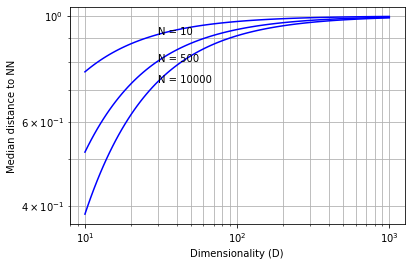

In [1]:
import numpy as np
import matplotlib.pyplot as plt
D = np.logspace(1, 3, 100)
plt.xscale('log', base=10); plt.yscale('log', base=10); plt.grid(which='both')
for N in [10, 500, 10000]:
  d = ( 1 - .5 ** (1 / N) ) ** (1 / D)
  plt.plot(D, d, 'b-')
  plt.text(30, ( 1 - .5 ** (1 / N) ) ** (1 / 30), 'N = %d' % N)
  plt.xlabel('Dimensionality (D)')
  plt.ylabel('Median distance to NN')

## Pérdida de localidad

**Pérdida de localidad:** $\;$ en general, con el aumento de la dimensión, tenemos que considerar entornos cada vez menos locales
* Supongamos que los datos se distribuyen uniformemente en un hipercubo unitario $D$-dimensional
* Consideremos un entorno hipercúbico centrado en la muestra de test que capture una fracción $r$ de los datos
* Longitud esperada del lado del entorno que captura una fracción $r$ del volumen unitario: $\;e_D(r)=r^{1/D}$
* Como $\,e_{10}(0.01)=0.63,\,$ debemos cubrir el $63\%$ de cada variable para capturar el $1\%$ de los datos

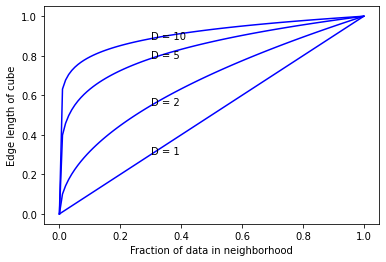

In [2]:
import numpy as np
import matplotlib.pyplot as plt
r = np.linspace(0, 1, 100)
for D in [1, 2, 5, 10]:
  e = r ** (1 / D)
  plt.plot(r, e, 'b-')
  plt.text(0.3, 0.3 ** (1 / D), 'D = %d' % D)
  plt.xlabel('Fraction of data in neighborhood')
  plt.ylabel('Edge length of cube')